In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import quantstats as qs

In [3]:
data = pd.DataFrame(yf.download('SPY', '2000-01-01')['Close'].rename('SPY'))

[*********************100%%**********************]  1 of 1 completed


In [39]:
data['SMA_5'] = data['SPY'].rolling(5).mean()
data['SMA_200'] = data['SPY'].rolling(200).mean()

In [40]:
data['buy'] = (
    ((data['SMA_200'] > data['SMA_200'].shift(1)) &
    (data['SPY'] < data['SPY'].shift(1)) &
    (data['SPY'].shift(1) < data['SPY'].shift(2)) &
    (data['SPY'].shift(2) < data['SPY'].shift(3)) &
    (data['SPY'] < data['SMA_5'])
    ))

In [41]:
data['sell'] = (data['SPY'] > data['SMA_5'])
data = data.dropna()

In [42]:
in_position = False
data['Strategy'] = 0
for index, row in data.iterrows():
    if row['buy'] and not in_position:
        in_position = True
    if in_position:
        data.at[index, 'Strategy'] = 1
    if row['sell'] and in_position:
        in_position = False

In [43]:
data['returns'] = data['SPY'].pct_change()
data['Strategy_returns'] = data['returns'] * data['Strategy'].shift(1)

In [44]:
qs.reports.metrics(data['Strategy_returns'])

                    Strategy
------------------  ----------
Start Period        2003-07-31
End Period          2023-11-17
Risk-Free Rate      0.0%
Time in Market      16.0%

Cumulative Return   121.93%
CAGR﹪              2.75%

Sharpe              0.6
Prob. Sharpe Ratio  99.62%
Sortino             0.88
Sortino/√2          0.62
Omega               1.32

Max Drawdown        -14.84%
Longest DD Days     1016

Gain/Pain Ratio     0.32
Gain/Pain (1M)      1.27

Payoff Ratio        0.97
Profit Factor       1.32
Common Sense Ratio  3.31
CPC Index           0.74
Tail Ratio          2.51
Outlier Win Ratio   21.23
Outlier Loss Ratio  1.73

MTD                 1.07%
3M                  0.0%
6M                  2.02%
YTD                 3.2%
1Y                  3.2%
3Y (ann.)           5.6%
5Y (ann.)           3.6%
10Y (ann.)          2.27%
All-time (ann.)     2.75%

Avg. Drawdown       -2.16%
Avg. Drawdown Days  102
Recovery Factor     5.7
Ulcer Index         0.03
Serenity Index      1.62


In [45]:
strategy_cumulative_returns = (1 + data['Strategy_returns']).cumprod().fillna(1) ** (252/len(data))
spy_cumulative_returns = (1 + data['returns']).cumprod().fillna(1) ** (252/len(data))

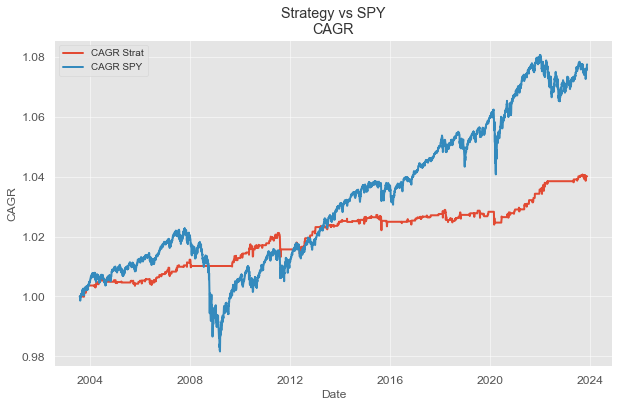

In [46]:
plt.figure(figsize=(10,6))
plt.style.use('ggplot')
plt.plot(strategy_cumulative_returns, label='CAGR Strat', linewidth=2)
plt.plot(spy_cumulative_returns, label='CAGR SPY', linewidth=2)

plt.title('Strategy vs SPY\nCAGR')
plt.xlabel('Date', fontsize=12)
plt.ylabel('CAGR', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)

plt.show()